### Python is a **BEAST** for statistical visualization.
1. Install libraries: `pip install matplotlib seaborn numpy pandas`

#### Essential Libraries
- **Matplotlib** `(matplotlib.pyplot)` → For basic plots (line, scatter, bar, histogram).

- **Seaborn** : For statistical plots (box plots, violin plots, pair plots, KDE).

- **Pandas** : For quick and simple plots using DataFrames.

- **NumPy** : For handling numerical data (arrays, calculations).

# Categorical data visualization

In [2]:
import matplotlib.pyplot as plt

In [3]:
# Data
brands = ["Audi", "BMW", "Mercedes"]
sales = [124, 98, 113]
colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]  # Blue, Orange, Green

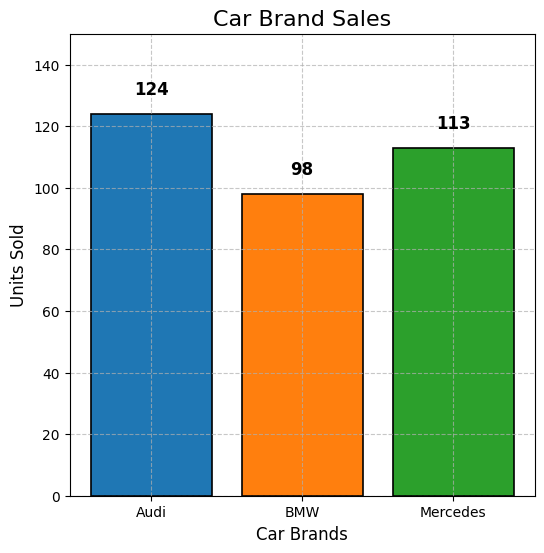

In [ ]:
# Create the bar chart
plt.figure(figsize=(6, 6))
bars = plt.bar(brands, sales, color=colors, edgecolor="black", linewidth=1.2)

# Add labels and title
plt.xlabel("Car Brands", fontsize=12)
plt.ylabel("Units Sold", fontsize=12)
plt.title("Car Brand Sales", fontsize=16)

# Display values on top of bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, 
             str(bar.get_height()), ha="center", va="bottom", fontsize=12, fontweight="bold")

# show grids
plt.grid(True, linestyle="--", alpha=0.7)  # Enables grid with dashed lines and transparency
plt.ylim(0, 150)  # Adjust the Y-axis from 0 to 350


# Show the chart
plt.show()

### ✅ 1. **Turn off edge color in bars**

* Set `edgecolor='none'`
* Or simply **omit the `edgecolor` parameter**

**Correct usage:**

```python
bars = plt.bar(city, sel, color=colors, edgecolor='none', linewidth=1)
```

Or omit entirely if not needed:

```python
bars = plt.bar(city, sel, color=colors)
```

---

### ✅ 2. **Increase space between bars**

You can increase spacing between bars in one of the following ways:

#### Option A: **Use `width` parameter** (most common)

Decrease the width of each bar to create more space between them.

```python
bars = plt.bar(city, sel, color=colors, width=0.6)  # default is 0.8
```

#### Option B: **Manually adjust bar positions**

If `city` is a list of categories, you can convert them to positions and shift them:

```python
import numpy as np

x = np.arange(len(city))  # numerical positions
spacing = 1.2  # increase spacing by multiplying
x_spaced = x * spacing

bars = plt.bar(x_spaced, sel, color=colors, width=0.8)
plt.xticks(x_spaced, city)  # set custom ticks
```


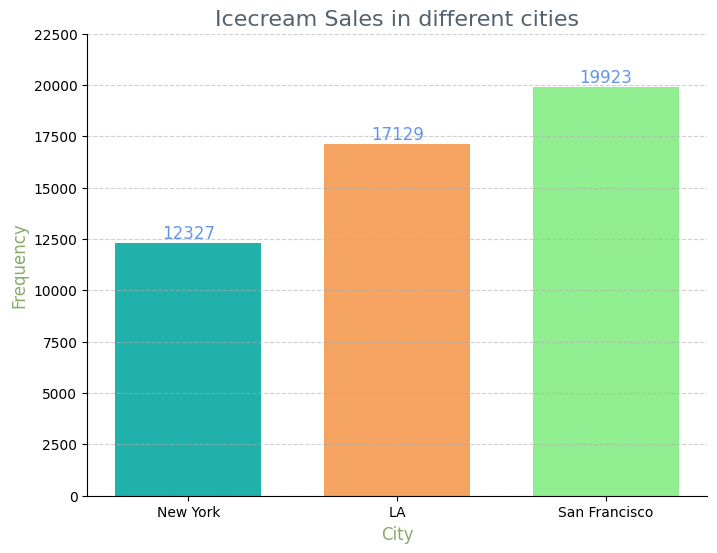

In [10]:
import matplotlib.pyplot as plt

# Data
city = ["New York", "LA", "San Francisco"]
sel = [12327, 17129, 19923]
colors = ["#20b2aa", "#f4a460", "#90ee90"]  # Blue, Orange, Green

# Create the bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(city, sel, color=colors, edgecolor='none', width=0.7)

# Add labels and title
plt.xlabel("City", fontsize=12, color="#87a96b")
plt.ylabel("Frequency", fontsize=12, color="#87a96b")
plt.title("Icecream Sales in different cities", fontsize=16, color="#54626f")

# Display values on top of bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 20, 
             str(bar.get_height()), ha="center", va="bottom", fontsize=12, color='#6495ed')

# show grids
plt.grid(axis='y', linestyle="--", alpha=0.6)  # Enables grid with dashed lines and transparency
plt.ylim(0, 22500)  # Adjust the Y-axis


# Remove top and right spines
ax = plt.gca()  # get current Axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show the chart
plt.show()

## A minimalist-style pie chart using `matplotlib`, with clean visuals and muted modern colors:


### ✨ Styling Notes:
- **Muted colors** (`#4E79A7`, `#A0CBE8`, `#F28E2B`) give a modern, clean feel.
- **Edge lines** make wedges distinct without clutter.
- **No 3D effects or gradients** – flat design = modern.
- **Simple percentage labels** for clarity.

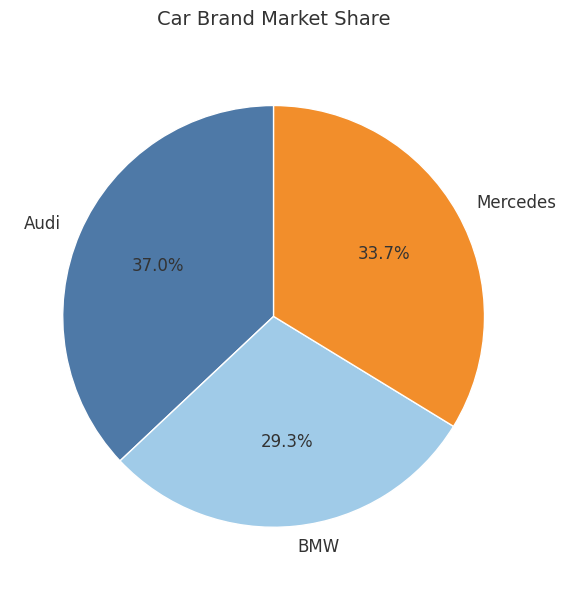

In [1]:
import matplotlib.pyplot as plt

# Data
brands = ["Audi", "BMW", "Mercedes"]
sales = [124, 98, 113]
colors = ["#4E79A7", "#A0CBE8", "#F28E2B"]  # Muted, modern colors

# Create pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    sales,
    labels=brands,
    colors=colors,
    startangle=90,
    wedgeprops={"edgecolor": "white", "linewidth": 1},
    textprops={"fontsize": 12, "color": "#333"},
    autopct="%1.1f%%"
)

# Minimalist styling
plt.title("Car Brand Market Share", fontsize=14, color="#333", pad=20)
plt.tight_layout()
plt.show()

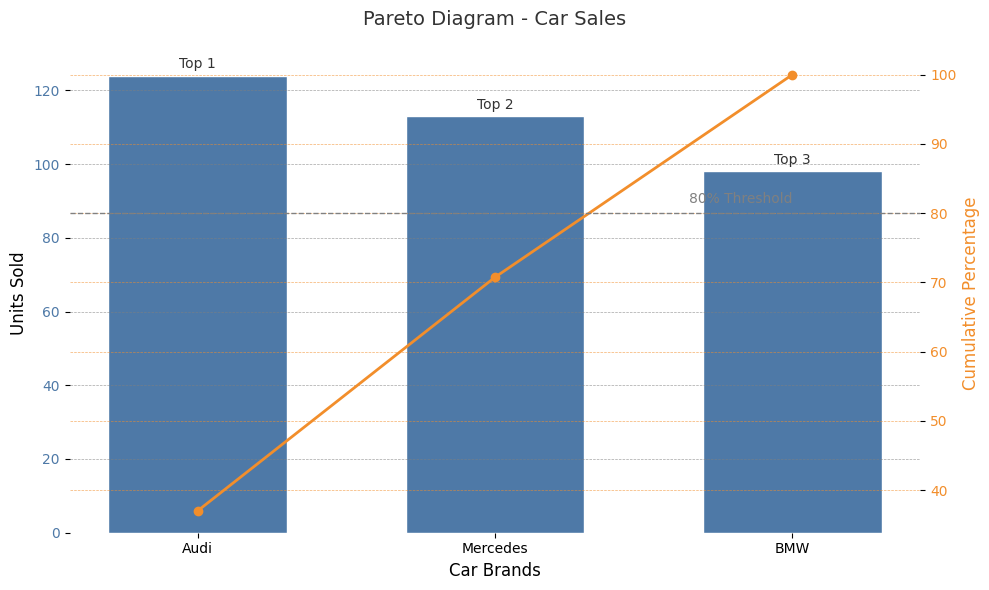

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Data
brands = ["Audi", "BMW", "Mercedes"]
sales = [124, 98, 113]

# Sort data by sales descending
sorted_indices = np.argsort(sales)[::-1]
brands_sorted = [brands[i] for i in sorted_indices]
sales_sorted = [sales[i] for i in sorted_indices]

# Cumulative percentage
cumulative = np.cumsum(sales_sorted)
cumulative_percent = 100 * cumulative / sum(sales_sorted)

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar chart (Pareto bars)
bars = ax1.bar(brands_sorted, sales_sorted, color="#4E79A7", edgecolor='white', width=0.6)
ax1.set_ylabel("Units Sold", fontsize=12)
ax1.set_xlabel("Car Brands", fontsize=12)
ax1.set_title("Pareto Diagram - Car Sales", fontsize=14, color="#333", pad=20)
ax1.tick_params(axis='y', labelcolor="#4E79A7")

# Annotate bars with ranks
for i, bar in enumerate(bars):
    label = f"Top {i+1}"
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2, label,
             ha='center', fontsize=10, color="#333")

# Line chart (Cumulative %)
ax2 = ax1.twinx()
ax2.plot(brands_sorted, cumulative_percent, color="#F28E2B", marker="o", linewidth=2)
ax2.set_ylabel("Cumulative Percentage", fontsize=12, color="#F28E2B")
ax2.tick_params(axis='y', labelcolor="#F28E2B")

# Horizontal line to highlight "vital few" (e.g., 80% line)
ax2.axhline(80, color="gray", linestyle="--", linewidth=1)
ax2.text(len(brands_sorted)-1, 81, "80% Threshold", ha="right", va="bottom", fontsize=10, color="gray")

# Minimalist styling
for spine in ax1.spines.values():
    spine.set_visible(False)
for spine in ax2.spines.values():
    spine.set_visible(False)


# Add Y-axis grid to bar chart axis
ax1.grid(True, which='major', axis='y', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)
ax2.grid(True, which='major', axis='y', linestyle='--', linewidth=0.5, color='#F28E2B', alpha=0.7)


plt.tight_layout()
plt.show()


# Neumerical data visualization

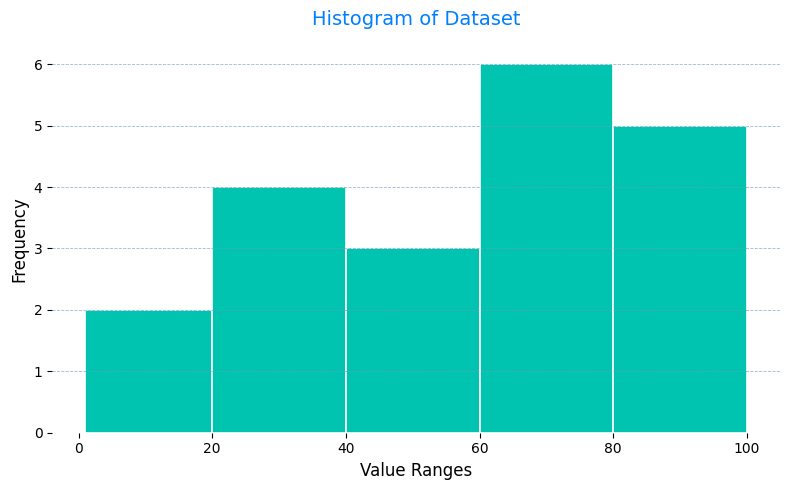

In [1]:
import matplotlib.pyplot as plt

# Data
dataset = [1, 9, 22, 24, 32, 33, 41, 44, 57, 66, 70, 
           73, 75, 76, 79, 82, 87, 89, 95, 100]

# Define equal-width bins (1–20, 21–40, ..., 81–100)
bins = [1, 20, 40, 60, 80, 100]

# Plot
plt.figure(figsize=(8, 5))
plt.hist(dataset, bins=bins, color="#00c4b0", edgecolor="white", linewidth=1.2, rwidth=1.0)

# Labels and title
plt.xlabel("Value Ranges", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Histogram of Dataset", fontsize=14, color="#007fff", pad=15)

# Gridlines
plt.grid(axis='y', linestyle='--', linewidth=0.6, alpha=0.7, color="#6d9bc3")

# Minimalist styling
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.tight_layout()
plt.show()

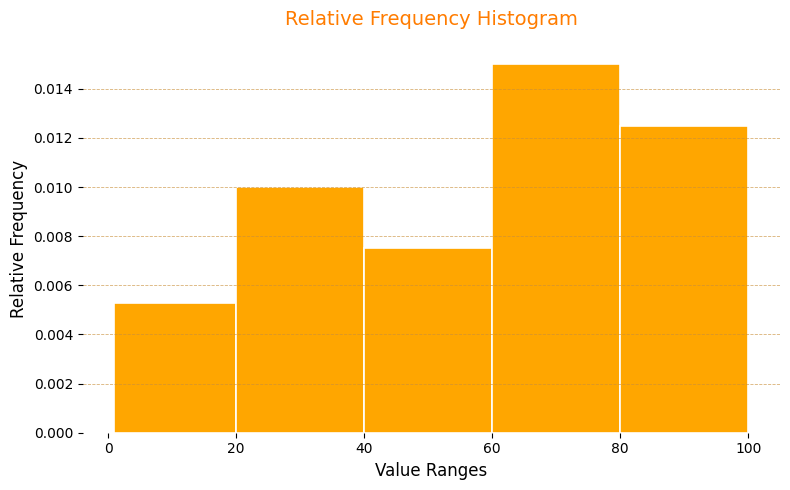

In [ ]:

import matplotlib.pyplot as plt

# Data
dataset = [1, 9, 22, 24, 32, 33, 41, 44, 57, 66, 70, 
           73, 75, 76, 79, 82, 87, 89, 95, 100]

# Define bins: 1–20, 21–40, ..., 81–100
bins = [1, 20, 40, 60, 80, 100]

# Plot
plt.figure(figsize=(8, 5))
# if bin widths are equal, setting density=True is enough to make it a relative frequency-style plot
plt.hist(dataset, bins=bins, density=True, color="#ffa600", edgecolor="white", linewidth=1.2, rwidth=1.0)

# Labels and title
plt.xlabel("Value Ranges", fontsize=12)
plt.ylabel("Relative Frequency", fontsize=12)
plt.title("Relative Frequency Histogram", fontsize=14, color="#ff7c00", pad=15)

# Gridlines
plt.grid(axis='y', linestyle='--', linewidth=0.6, alpha=0.7, color="#c98f3b")

# Minimalist styling
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.tight_layout()
plt.show()


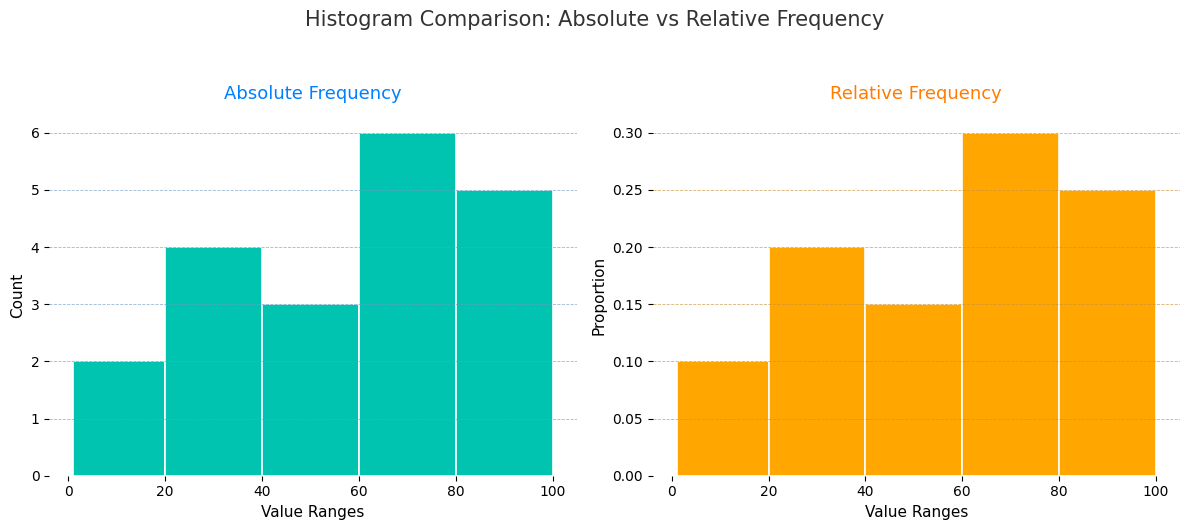

In [ ]:
import matplotlib.pyplot as plt

# Data
dataset = [1, 9, 22, 24, 32, 33, 41, 44, 57, 66, 70, 
           73, 75, 76, 79, 82, 87, 89, 95, 100]

# Define bins: 1–20, 21–40, ..., 81–100 (extend to 101 to include 100)
bins = [1, 20, 40, 60, 80, 100]

# Create subplots (NO sharey=True)
fig, axs = plt.subplots(1, 2, figsize=(12, 5))  # Removed sharey=True
# sharey=True causes problem
# fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharey=True)   

# --- Absolute Frequency Histogram ---
axs[0].hist(dataset, bins=bins, color="#00c4b0", edgecolor="white", linewidth=1.2, rwidth=1.0)
axs[0].set_title("Absolute Frequency", fontsize=13, color="#007fff", pad=12)
axs[0].set_xlabel("Value Ranges", fontsize=11)
axs[0].set_ylabel("Count", fontsize=11)
axs[0].grid(axis='y', linestyle='--', linewidth=0.6, alpha=0.7, color="#6d9bc3")
for spine in axs[0].spines.values():
    spine.set_visible(False)

# --- Relative Frequency Histogram ---
axs[1].hist(dataset, bins=bins, weights=[1./len(dataset)]*len(dataset), 
            color="#ffa600", edgecolor="white", linewidth=1.2, rwidth=1.0)
axs[1].set_title("Relative Frequency", fontsize=13, color="#ff7c00", pad=12)
axs[1].set_xlabel("Value Ranges", fontsize=11)
axs[1].set_ylabel("Proportion", fontsize=11)
axs[1].grid(axis='y', linestyle='--', linewidth=0.6, alpha=0.7, color="#c98f3b")
for spine in axs[1].spines.values():
    spine.set_visible(False)

plt.suptitle("Histogram Comparison: Absolute vs Relative Frequency", fontsize=15, color="#333", y=1.05)
plt.tight_layout()
plt.show()

# Cross Tables and Scatter Plots

In [1]:
import pandas as pd

# Step 1: Define the data
# (Student ID, Reading, Writing)
data = [(1, 273,216),
(2, 292,282),
(3, 219,250),
(4, 241,217),
(5, 284,266),
(6, 247,294),
(7, 237,215),
(8, 286,203),
(9, 237,286),
(10, 266,263),
(11, 311,270),
(12, 324,211),
(13, 330,243),
(14, 331,275),
(15, 336,367),
(16, 344,378),
(17, 346,315),
(18, 346,208),
(19, 356,451),
(20, 364,346),
(21, 365,435),
(22, 365,579),
(23, 369,390),
(24, 436,589),
(25, 393,365),
(26, 394,480),
(27, 417,499),
(28, 438,414),
(29, 398,530),
(30, 409,366),
(31, 437,453),
(32, 442,396),
(33, 442,531),
(34, 408,453),
(35, 387,444),
(36, 418,597),
(37, 461,407),
(38, 457,589),
(39, 371,489),
(40, 383,349),
(41, 372,584),
(42, 463,446),
(43, 452,451),
(44, 550,300),
(45, 529,480),
(46, 578,580),
(47, 454,457),
(48, 522,525),
(49, 554,483),
(50, 591,470),
(51, 601,585),
(52, 610,406),
(53, 611,503),
(54, 613,516),
(55, 614,639),
(56, 619,546),
(57, 634,556),
(58, 646,599),
(59, 668,534),
(60, 673,526),
(61, 696,613),
(62, 704,536),
(63, 705,578),
(64, 705,608),
(65, 708,717),
(66, 713,718),
(67, 713,719),
(68, 727,720),
(69, 735,724),
(70, 763,734),
(71, 776,735),
(72, 777,736),
(73, 785,738),
(74, 785,740),
(75, 547,476),
(76, 507,452),
(77, 474,451),
(78, 536,503),
(79, 455,499),
(80, 470,509),
(81, 536,540),
(82, 522,496),
(83, 462,507),
(84, 467,457),
(85, 477,549),
(86, 505,519),
(87, 515,491),
(88, 450,487),
(89, 542,455),
(90, 509,546),
(91, 455,514),
(92, 524,533),
(93, 451,536),
(94, 505,503),
(95, 465,507),
(96, 525,489),
(97, 508,488),
(98, 511,520),
(99, 469,527),
(100, 457,521),
(101, 499,462),
(102, 528,536),
(103, 539,549),
(104, 549,521)]


# Step 2: Create DataFrame
df = pd.DataFrame(data, columns=["Student ID", "Reading", "Writing"])

# Step 3: Save to CSV
df.to_csv("SAT_scores.csv", index=False)

# Step 4: Load back from CSV
loaded_df = pd.read_csv("SAT_scores.csv")

print(loaded_df)


     Student ID  Reading  Writing
0             1      273      216
1             2      292      282
2             3      219      250
3             4      241      217
4             5      284      266
..          ...      ...      ...
99          100      457      521
100         101      499      462
101         102      528      536
102         103      539      549
103         104      549      521

[104 rows x 3 columns]


- Suppose you're an investment manager handling— stocks, bonds and real estate for three different investors.  
- Each investor allocates their money differently based on their risk profile.  
### Cross table

In [2]:
import pandas as pd

# Original data
data = {
    "Type of investment": ["Stocks", "Bonds", "Real Estate"],
    "Investor A": [96, 181, 88],
    "Investor B": [185, 3, 152],
    "Investor C": [39, 29, 142]
}

# Create DataFrame
df = pd.DataFrame(data)

# Set index to make it look like a cross-table
cross_table = df.set_index("Type of investment")

# Add row totals
cross_table["Total"] = cross_table.sum(axis=1)

# Add column totals (including the new "Total" column)
cross_table.loc["Total"] = cross_table.sum()

print(cross_table)


                    Investor A  Investor B  Investor C  Total
Type of investment                                           
Stocks                      96         185          39    320
Bonds                      181           3          29    213
Real Estate                 88         152         142    382
Total                      365         340         210    915


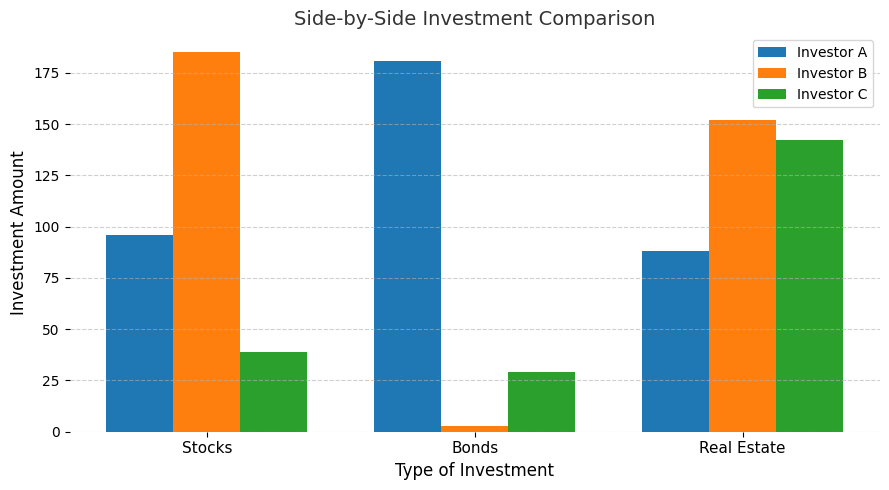

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data from cross table
investments = data["Type of investment"]
investor_a = data["Investor A"]
investor_b = data["Investor B"]
investor_c = data["Investor C"]

# Bar width and x positions
bar_width = 0.25
x = np.arange(len(investments))

# Create plot
plt.figure(figsize=(9, 5))
plt.bar(x - bar_width, investor_a, width=bar_width, label="Investor A", color="#1f77b4")
plt.bar(x, investor_b, width=bar_width, label="Investor B", color="#ff7f0e")
plt.bar(x + bar_width, investor_c, width=bar_width, label="Investor C", color="#2ca02c")

# Labels and styling
plt.xlabel("Type of Investment", fontsize=12)
plt.ylabel("Investment Amount", fontsize=12)
plt.title("Side-by-Side Investment Comparison", fontsize=14, color="#333")
plt.xticks(x, investments, fontsize=11)
plt.yticks(fontsize=10)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Minimalist styling
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.tight_layout()
plt.show()

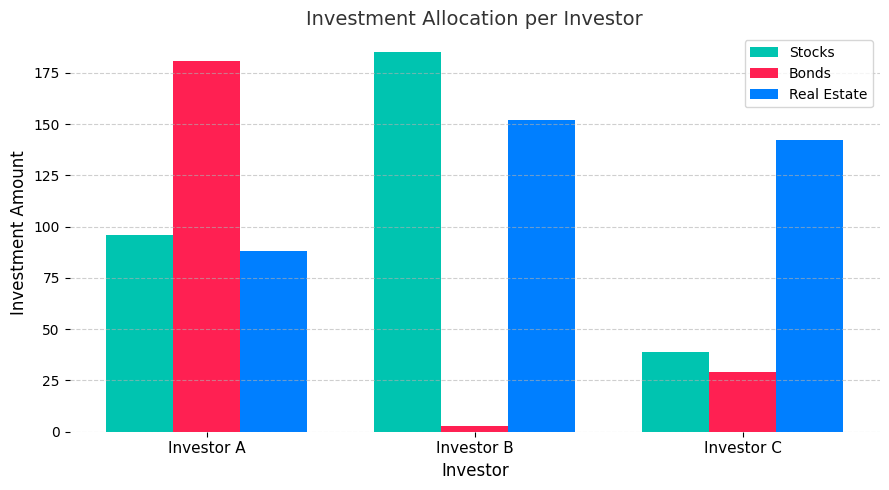

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Data from cross table
investments = data["Type of investment"]
investor_a = data["Investor A"]
investor_b = data["Investor B"]
investor_c = data["Investor C"]

# Transpose structure: group by investor
x = np.arange(len(["Investor A", "Investor B", "Investor C"]))  # 3 investors
bar_width = 0.25

# Stack asset allocations per investor
stocks = [investor_a[0], investor_b[0], investor_c[0]]
bonds = [investor_a[1], investor_b[1], investor_c[1]]
real_estate = [investor_a[2], investor_b[2], investor_c[2]]

# Plot
plt.figure(figsize=(9, 5))
plt.bar(x - bar_width, stocks, width=bar_width, label="Stocks", color="#00c4b0")
plt.bar(x, bonds, width=bar_width, label="Bonds", color="#ff2052")
plt.bar(x + bar_width, real_estate, width=bar_width, label="Real Estate", color="#007fff")

# Labels and styling
plt.xlabel("Investor", fontsize=12)
plt.ylabel("Investment Amount", fontsize=12)
plt.title("Investment Allocation per Investor", fontsize=14, color="#333")
plt.xticks(x, ["Investor A", "Investor B", "Investor C"], fontsize=11)
plt.yticks(fontsize=10)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Minimalist frame
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.tight_layout()
plt.show()


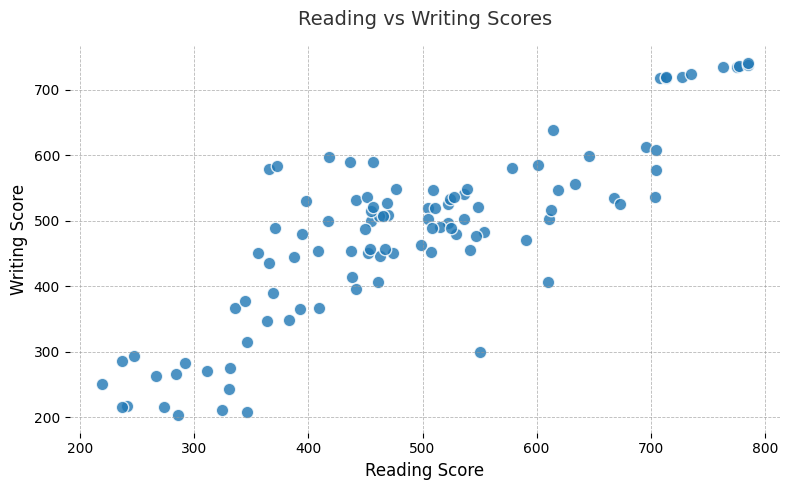

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("ch1_data_SAT_scores.csv")

# Plot: Modern scatterplot of Reading vs Writing scores
plt.figure(figsize=(8, 5))
plt.scatter(df["Reading"], df["Writing"], color="#1f77b4", alpha=0.8, edgecolors='white', s=80)

# Labels and title
plt.title("Reading vs Writing Scores", fontsize=14, color="#333", pad=15)
plt.xlabel("Reading Score", fontsize=12)
plt.ylabel("Writing Score", fontsize=12)

# Grid and minimalist styling
plt.grid(True, linestyle='--', linewidth=0.6, alpha=0.7, color="#999")
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.tight_layout()

# Save as SVG
# plt.savefig("sat_scores_scatter.svg", format="svg")

# Optionally show the plot
plt.show()


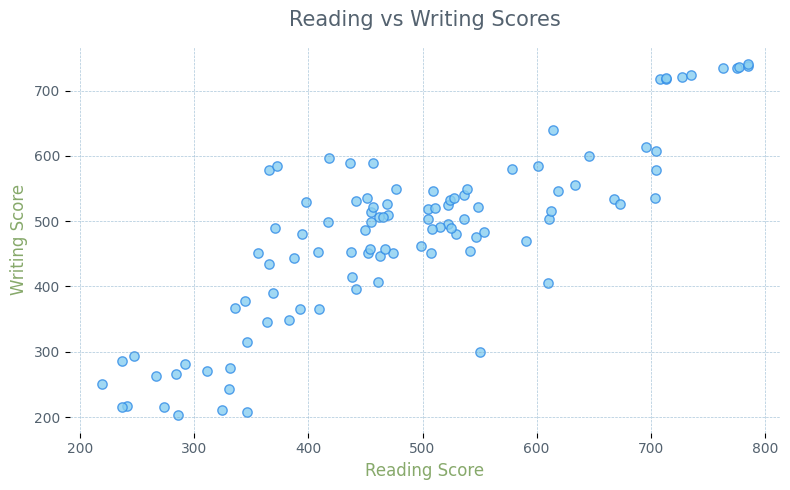

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("ch1_data_SAT_scores.csv")

# Modern font settings
plt.rcParams["font.family"] = "DejaVu Sans"

# Create the scatterplot
plt.figure(figsize=(8, 5))
plt.scatter(df["Reading"], df["Writing"], 
            color="#89cff0", edgecolors='#318ce7', 
            s=45, alpha=0.8)

# Title and axis labels
plt.title("Reading vs Writing Scores", fontsize=15, color="#54626f", pad=15)
plt.xlabel("Reading Score", fontsize=12, color="#87a96b")
plt.ylabel("Writing Score", fontsize=12, color="#87a96b")

# Modern tick colors and font size
plt.xticks(color="#54626f", fontsize=10)
plt.yticks(color="#54626f", fontsize=10)

# Grid and minimalist style
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.6, color="#72a0c1")
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.tight_layout()

# Save as SVG
# plt.savefig("sat_scores_scatter_modern.svg", format="svg")

# Optional: show the plot
plt.show()
